# Network analysis

Graph analysis offers three modes, of which the first two are used within `momepy` (as per v0.1):
- node-based
    - value per node
- edge-based
    - value per edge
- network-based
    - single value per network

In [1]:
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt

We will use dataset included in `momepy` to load street network, and then we convert it to graph:

In [2]:
streets = gpd.read_file(momepy.datasets.get_path('bubenec'), layer='streets')
graph = momepy.gdf_to_nx(streets)

## Node-based analysis

Once we have the graph, we can use momepy functions, like the one measuring clustering:

In [3]:
graph = momepy.clustering(graph, name='clustering')

### Using sub-graph

Momepy includes local characters measured on the network within a certain radius from each node, like meshedness. The function will generate `ego_graph` for each node so that it might take a while for more extensive networks. Radius can be defined topologically:

In [4]:
graph = momepy.meshedness(graph, radius=5, name='meshedness')

100%|██████████| 29/29 [00:00<00:00, 219.85it/s]


Or metrically, using distance which has been saved as an edge argument by `gdf_to_nx` (or any other weight).

In [5]:
graph = momepy.meshedness(graph, radius=400, name='meshedness400',
                          distance='mm_len')

100%|██████████| 29/29 [00:00<00:00, 244.82it/s]


Once we have finished the graph-based analysis, we can go back to `GeoPandas`. In this notebook, we are interested in nodes only:

In [7]:
nodes = momepy.nx_to_gdf(graph, points=True, lines=False, spatial_weights=False)

Now we can plot our results in a standard way, or link them to other elements (using `get_node_id`).

Clustering:

/Users/martin/anaconda3/envs/mmp_guide/lib/python3.7/site-packages/mapclassify/classifiers.py:138: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/martin/anaconda3/envs/mmp_guide/lib/python3.7/site-packages/mapclassify/classifiers.py:140: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


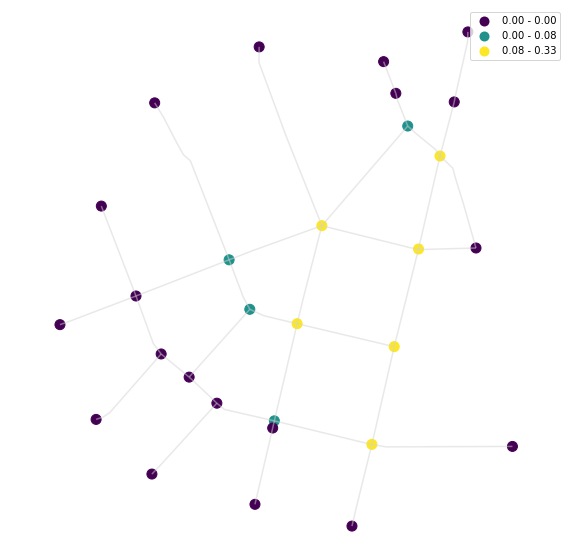

In [8]:
f, ax = plt.subplots(figsize=(10, 10))
nodes.plot(ax=ax, column='clustering', markersize=100, legend=True, cmap='viridis', scheme='quantiles')
streets.plot(ax=ax, color='lightgrey', alpha=0.5)
ax.set_axis_off()
plt.axis('equal')
plt.show()

Meshedness based on topological distance:

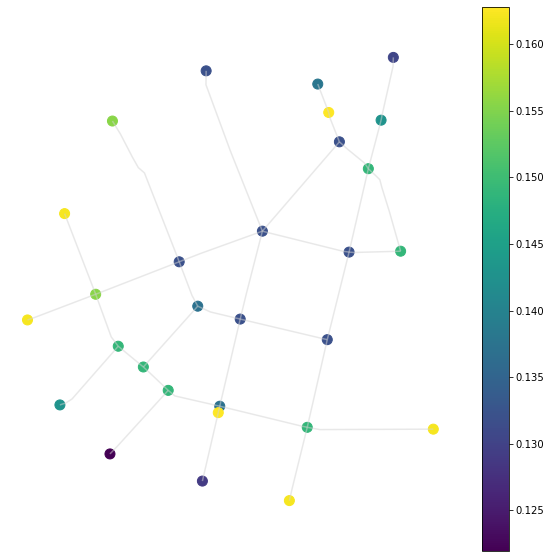

In [9]:
f, ax = plt.subplots(figsize=(10, 10))
nodes.plot(ax=ax, column='meshedness', markersize=100, legend=True, cmap='viridis')
streets.plot(ax=ax, color='lightgrey', alpha=0.5)
ax.set_axis_off()
plt.axis('equal')
plt.show()

And meshedness based on 400 metres:

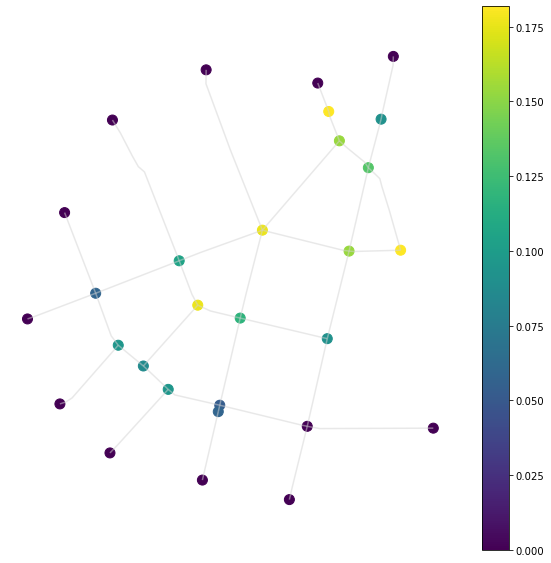

In [10]:
f, ax = plt.subplots(figsize=(10, 10))
nodes.plot(ax=ax, column='meshedness400', markersize=100, legend=True, cmap='viridis')
streets.plot(ax=ax, color='lightgrey', alpha=0.5)
ax.set_axis_off()
plt.axis('equal')
plt.show()